# Dataset 1

In [46]:
#import Necessary librares
import pandas as pd

from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as datetime
import numpy as np

In [47]:
# Origanal Dataset
O_df = pd.read_csv("Dataset/btcalphaUSD.csv", header=None)

In [48]:
# DataFrame For Manipulation
df = pd.DataFrame.copy(O_df)
df.columns = ["DateTime","Price","Volume"]

In [49]:
#Convert Date Into Human Readable
df['DateTime'] = pd.to_datetime(df['DateTime'], unit='s')

In [50]:
# Convert DateTime Column Into Index
df.index = df["DateTime"]
del df["DateTime"]

In [51]:
df.head()

,Price,Volume
DateTime,,
2016-11-01 18:42:25,715.000,0.002797
2016-11-01 20:17:40,720.000,0.001300
2016-11-01 20:18:11,720.199,0.001264
2016-11-01 20:49:22,720.199,0.002902
2016-11-01 20:49:22,720.200,0.001223


In [52]:
# Convert Time Data into OHLC (Open, High, Low, Close)
df_ohlc = df.Price.resample('1D').ohlc()
#print(df_ohlc.head())

df_ohlc.head()

,open,high,low,close
DateTime,,,,
2016-11-01,715.000,720.2,715.00,717.000
2016-11-02,717.000,717.5,712.00,716.500
2016-11-03,715.000,736.0,688.58,695.681
2016-11-04,695.681,700.0,686.30,687.000
2016-11-05,687.000,695.0,687.00,695.000


In [53]:
# Check Is Any Null Data
df_ohlc.isnull().values.any()

False

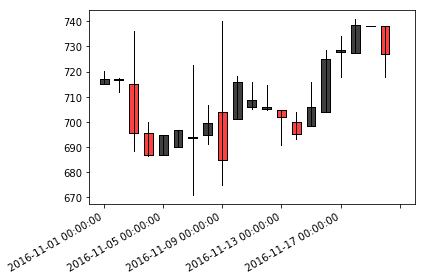

             open       high         low       close
count   20.000000   20.00000   20.000000   20.000000
mean   708.109600  719.39795  700.723050  708.847650
std     15.033734   15.05263   17.053141   16.231174
min    687.000000  695.00000  670.890000  685.000000
25%    697.592750  706.22425  689.637500  695.568250
50%    704.280000  717.88000  699.770500  705.875000
75%    715.500000  734.50000  712.750000  719.000000
max    738.000000  741.00000  738.000000  738.493000


,open,high,low,close
DateTime,,,,
2016-11-01,715.000,720.2,715.00,717.000
2016-11-02,717.000,717.5,712.00,716.500
2016-11-03,715.000,736.0,688.58,695.681
2016-11-04,695.681,700.0,686.30,687.000
2016-11-05,687.000,695.0,687.00,695.000


In [54]:


# ---------------------------------------------
# Remove head() if you want to show full Graph
# ---------------------------------------------
quotes = df_ohlc.head(20)

fig, ax = plt.subplots()
candlestick2_ohlc(ax,quotes['open'],quotes['high'],quotes['low'],quotes['close'],width=0.6)

xdate = quotes.index

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig.autofmt_xdate()
fig.tight_layout()

plt.show()
print(quotes.describe())
df_ohlc.head()

In [55]:
#Store Data into another csv
df_ohlc.to_csv(path_or_buf='Dataset/C_btcalphaUSD.csv')

# Dataset - 2

In [57]:
# Read Data from csv file
O_df = pd.read_csv('Dataset/SML.csv')

In [59]:
O_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-01,723.390015,724.229980,709.000000,712.770020,712.770020,81400
1,2016-11-02,712.150024,713.510010,705.349976,705.679993,705.679993,75500
2,2016-11-03,708.719971,709.640015,702.989990,703.640015,703.640015,84400
3,2016-11-04,704.469971,714.219971,704.010010,707.169983,707.169983,86800
4,2016-11-07,714.960022,725.229980,714.960022,724.260010,724.260010,84800


In [60]:
df = pd.DataFrame.copy(O_df)

In [61]:
# Convert Object type into DateTime
df.Date = pd.to_datetime(df.Date)
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [62]:
# Convert DateTime Column Into Index
df.index = pd.to_datetime(df.Date)
del df["Date"]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,723.390015,724.229980,709.000000,712.770020,712.770020,81400
2016-11-02,712.150024,713.510010,705.349976,705.679993,705.679993,75500
2016-11-03,708.719971,709.640015,702.989990,703.640015,703.640015,84400
2016-11-04,704.469971,714.219971,704.010010,707.169983,707.169983,86800
2016-11-07,714.960022,725.229980,714.960022,724.260010,724.260010,84800


In [63]:
# Check DataType
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [64]:

# take only column of Intrest
df_ohlc = df[["Open","High","Low","Close"]]
df_ohlc.isnull().values.any()

False

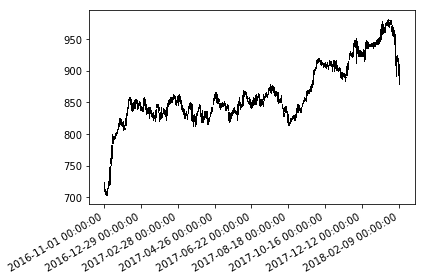

,Open,High,Low,Close
count,321.000000,321.000000,321.000000,321.000000
mean,864.182709,868.437010,859.586044,864.332429
std,49.598032,49.100461,49.111428,48.905112
min,704.469971,709.640015,702.989990,703.640015
25%,835.599976,840.869995,830.979980,834.849976
50%,851.549988,855.580017,846.919983,851.479980
75%,902.570007,909.020020,899.109985,903.479980
max,981.950012,982.179993,974.080017,979.570007


In [65]:
#Create candlestick Graph

quotes = df_ohlc

fig, ax = plt.subplots()
candlestick2_ohlc(ax,quotes['Open'],quotes['High'],quotes['Low'],quotes['Close'],width=0.6)

xdate = quotes.index

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig.autofmt_xdate()
fig.tight_layout()

plt.show()
quotes.describe()

In [66]:
#Store Data into another csv
df_ohlc.to_csv(path_or_buf='Dataset/C_SAP_600.csv')

In [67]:
df_ohlc.head()

,Open,High,Low,Close
Date,,,,
2016-11-01,723.390015,724.229980,709.000000,712.770020
2016-11-02,712.150024,713.510010,705.349976,705.679993
2016-11-03,708.719971,709.640015,702.989990,703.640015
2016-11-04,704.469971,714.219971,704.010010,707.169983
2016-11-07,714.960022,725.229980,714.960022,724.260010


# Correlation Matrix

In [68]:
# Load Both DataSet
df_btcalpha = pd.read_csv('Dataset/C_btcalphaUSD.csv')
df_sap_600 =  pd.read_csv('Dataset/C_SAP_600.csv')

In [69]:
df_btcalpha.head()

,DateTime,open,high,low,close
0,2016-11-01,715.000,720.2,715.00,717.000
1,2016-11-02,717.000,717.5,712.00,716.500
2,2016-11-03,715.000,736.0,688.58,695.681
3,2016-11-04,695.681,700.0,686.30,687.000
4,2016-11-05,687.000,695.0,687.00,695.000


In [70]:
# Convert Index into DateTime 
df_btcalpha.index = df_btcalpha.DateTime
del df_btcalpha['DateTime']

In [71]:
# Convert Index into DateTime 
df_sap_600.index = df_sap_600.Date
del df_sap_600['Date']

In [72]:
df_btcalpha.tail()

,open,high,low,close
DateTime,,,,
2018-02-08,8114.131,9253.253,8106.962,8816.800
2018-02-09,8811.236,9360.360,8276.129,9287.707
2018-02-10,9230.000,9708.003,8726.385,9162.410
2018-02-11,9167.760,9167.760,8400.570,8635.970
2018-02-12,8536.923,9630.000,8520.487,9466.000


In [73]:
df_sap_600.tail()

,Open,High,Low,Close
Date,,,,
2018-02-05,935.979980,942.789978,908.559998,908.739990
2018-02-06,895.309998,922.489990,891.059998,918.409973
2018-02-07,917.690002,924.159973,915.750000,918.539978
2018-02-08,920.150024,920.539978,893.000000,893.049988
2018-02-09,901.750000,909.849976,878.989990,902.799988


In [74]:
# Now Merge Both DataSet
result = pd.merge(df_btcalpha, df_sap_600,how='inner', left_index=True, right_index=True)
result.tail()

,open,high,low,close,Open,High,Low,Close
2018-02-05,8760.304,8965.942,7120.101,7433.611,935.979980,942.789978,908.559998,908.739990
2018-02-06,7431.043,8409.879,6420.000,8218.777,895.309998,922.489990,891.059998,918.409973
2018-02-07,8212.250,9036.150,7678.427,8117.662,917.690002,924.159973,915.750000,918.539978
2018-02-08,8114.131,9253.253,8106.962,8816.800,920.150024,920.539978,893.000000,893.049988
2018-02-09,8811.236,9360.360,8276.129,9287.707,901.750000,909.849976,878.989990,902.799988


In [75]:
# We shoud use here Hirarchical Column To Identify Spesific Data
crypto_lable = ["btcalpha","SAP600"]
ohlc_lable = [u'Open', u'Low', u'High', u'Close']
mul_index = pd.MultiIndex.from_product([crypto_lable, ohlc_lable], names=['Object', 'OHLC'])
result.columns = mul_index

In [76]:
#Compute Percentage Change
rets = result.pct_change()

In [77]:
#Compute Correlation Matrix
corr = rets.corr()
corr

Object          btcalpha                                  SAP600            \
OHLC                Open       Low      High     Close      Open       Low   
Object   OHLC                                                                
btcalpha Open   1.000000  0.604808  0.351642  0.172757  0.142857  0.109888   
         Low    0.604808  1.000000  0.313275  0.594364  0.031440  0.090068   
         High   0.351642  0.313275  1.000000  0.469377  0.128116  0.065700   
         Close  0.172757  0.594364  0.469377  1.000000 -0.045172  0.046716   
SAP600   Open   0.142857  0.031440  0.128116 -0.045172  1.000000  0.689094   
         Low    0.109888  0.090068  0.065700  0.046716  0.689094  1.000000   
         High   0.151752  0.078482  0.156695  0.025507  0.632590  0.701290   
         Close  0.058623  0.098887  0.043217  0.110504  0.205508  0.668594   

Object                              
OHLC                High     Close  
Object   OHLC                       
btcalpha Open   0.151752  0.058623  
         Low    0.078482  0.098887  
         High   0.156695  0.043217  
         Close  0.025507  0.110504  
SAP600   Open   0.632590  0.205508  
         Low    0.701290  0.668594  
         High   1.000000  0.712546  
         Close  0.712546  1.000000

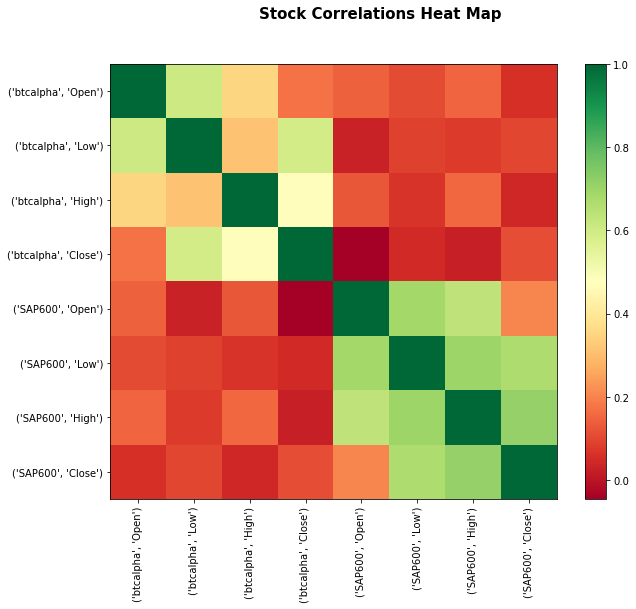

In [43]:
#Plot Correlation Matrix using Matplotlib

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Stock Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()